In [ ]:
# Feature Engineering is used to create new features or transform new features and get the most out of the data
# Creating new features such as Length of the text field, use of punctuations in the text or % of characters capitalized in the text

In [13]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)
dataset = pd.read_csv("SMSSpamCollection.txt", sep = '\t', header = None)
dataset.columns = ['label','body_text']

In [14]:
dataset['body_len'] = dataset['body_text'].apply(lambda x: len(x) - x.count(" "))
dataset.head()

,label,body_text,body_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives around here though",49


In [15]:
import string
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)* 100
dataset['punct%'] = dataset['body_text'].apply(lambda x:count_punct(x))
dataset.head()
    

,label,body_text,body_len,punct%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1


In [27]:
import re
import string
def count_capital(text):
    text_no_punct = "".join([char for char in text if char not in string.punctuation])
    count = sum([1 for char in text_no_punct if (char == char.upper() and char != " ")])
    return count
dataset['cap_count'] = dataset['body_text'].apply(lambda x: count_capital(x))
dataset.head()

,label,body_text,body_len,punct%,cap_count
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92,9.8,3
1,ham,Ok lar... Joking wif u oni...,24,25.0,2
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7,35
3,ham,U dun say so early hor... U c already then say...,39,15.4,2
4,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1,2


In [34]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

C:\Users\BloodWarrior\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\BloodWarrior\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


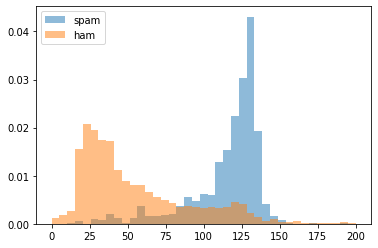

In [35]:
bins  = np.linspace(0, 200, 40)
pyplot.hist(dataset[dataset['label'] == 'spam']['body_len'], bins, alpha = 0.5, normed = True, label = 'spam')
pyplot.hist(dataset[dataset['label'] == 'ham']['body_len'], bins, alpha = 0.5, normed = True, label = 'ham')
pyplot.legend(loc = 'upper left')
pyplot.show()

C:\Users\BloodWarrior\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\BloodWarrior\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


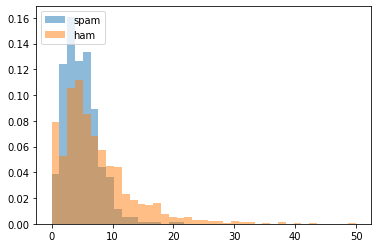

In [36]:
bins  = np.linspace(0, 50, 40)
pyplot.hist(dataset[dataset['label'] == 'spam']['punct%'], bins, alpha = 0.5, normed = True, label = 'spam')
pyplot.hist(dataset[dataset['label'] == 'ham']['punct%'], bins, alpha = 0.5, normed = True, label = 'ham')
pyplot.legend(loc = 'upper right')
pyplot.show()

C:\Users\BloodWarrior\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\BloodWarrior\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


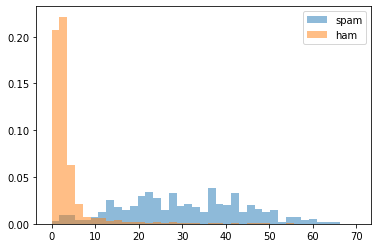

In [43]:
bins = np.linspace(0,70,40)
pyplot.hist(dataset[dataset['label'] == 'spam']['cap_count'], bins, alpha = 0.5, normed = True, label = 'spam')
pyplot.hist(dataset[dataset['label'] == 'ham']['cap_count'], bins, alpha = 0.5, normed = True, label = 'ham')
pyplot.legend(loc = 'upper right')
pyplot.show()

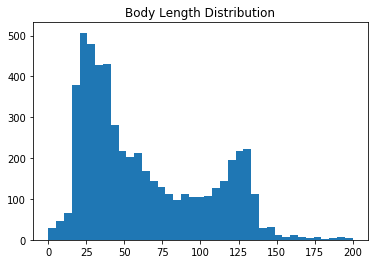

In [44]:
bins  = np.linspace(0, 200, 40)
pyplot.hist(dataset['body_len'], bins)
pyplot.title('Body Length Distribution')
pyplot.show()

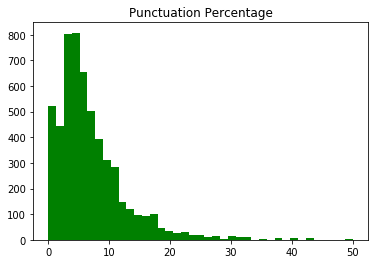

In [46]:
bins  = np.linspace(0, 50, 40)
pyplot.hist(dataset['punct%'], bins, color = 'green')
pyplot.title('Punctuation Percentage')
pyplot.show()

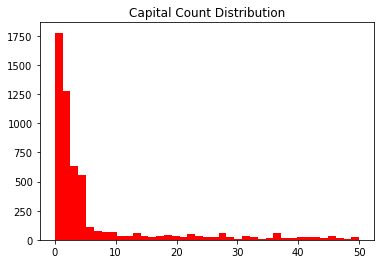

In [45]:
bins  = np.linspace(0, 50, 40)
pyplot.hist(dataset['cap_count'], bins, color = 'red')
pyplot.title('Capital Count Distribution')
pyplot.show()